In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 1. 문제정의
----------------
- 전체적으로 매출이 높은 수준은 아니기 때문에, 매출 증가를 위한 마케팅 전략을 세워야함
- A사의 E-commerce사업이 잘되기 위해선 고객 세그먼트를 통해 주 고객을 타겟팅 해야함

### 2. 기대효과
--------------
- A사의 E-commerce 매출 상승
- A사 이용 고객 수 증가

### 3. 해결방법
------------------------
- 전체 데이터 기간동안의 고객 세그먼트 분석, 배송 분석, 마케팅(프로모션) 분석 등을 통해 매출 상승을 위해 필요한 요소 확인
- 확인된 요인들로 마케팅 전략을 세움

### 4. 성과측정
------------------------
- 마케팅 전략을 사용한 후 전월과 비교하여 매출이 증가한 것을 확인

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df1 = pd.read_csv('/kaggle/input/zb-da1-competition/Special_Sale_Calendar.csv')
df2 = pd.read_csv('/kaggle/input/zb-da1-competition/ConsumerElectronics.csv')
df3 = pd.read_csv('/kaggle/input/zb-da1-competition/NPS_Stockindex.csv')
df4 = pd.read_csv('/kaggle/input/zb-da1-competition/Media Investment.csv')

In [5]:
print(df2.dtypes)

fsn_id                              object
order_date                          object
Year                                 int64
Month                                int64
order_id                           float64
order_item_id                      float64
gmv                                 object
units                                int64
deliverybdays                       object
deliverycdays                       object
s1_fact.order_payment_type          object
sla                                  int64
cust_id                             object
pincode                             object
product_analytic_super_category     object
product_analytic_category           object
product_analytic_sub_category       object
product_analytic_vertical           object
product_mrp                          int64
product_procurement_sla              int64
dtype: object


In [6]:
df2['order_date'] = pd.to_datetime(df2['order_date'])
# 'gmv'공백0으로 대체
df2['gmv'] = df2['gmv'].replace(' ', 0)
df2['gmv'] = df2['gmv'].astype(float)
# 'units'공백0으로 대체
df2['units'] = df2['units'].replace(' ', 0)
df2['units'] = df2['units'].astype(float)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

# 시각화(GMV, Units)

## GMV(판매액) / 월별

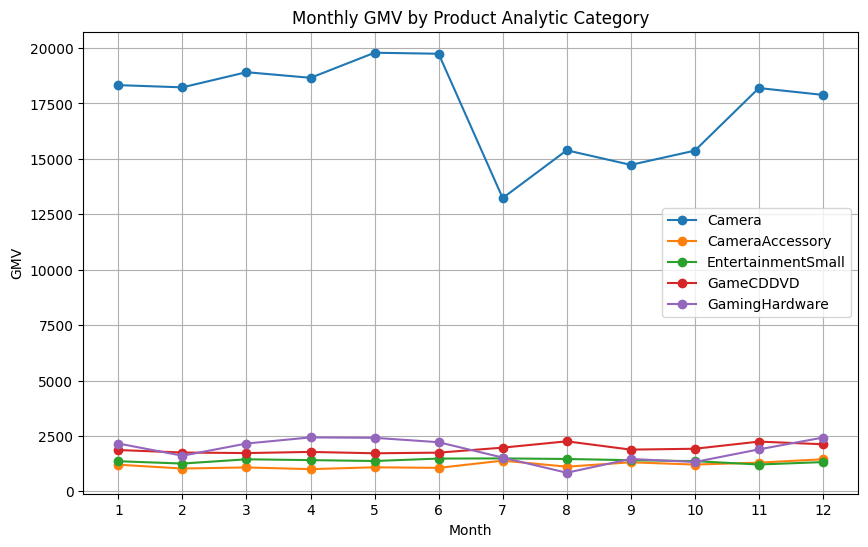

In [8]:
monthly_gmv_product_category = df2.groupby([df2['Month'], 'product_analytic_category'])['gmv'].mean()

plt.figure(figsize=(10, 6))

for category in monthly_gmv_product_category.unstack().columns:
    plt.plot(monthly_gmv_product_category.unstack().index, monthly_gmv_product_category.unstack()[category], 
             marker='o', linestyle='-', label=category)

plt.xlabel('Month')
plt.ylabel('GMV')
plt.title('Monthly GMV by Product Analytic Category')
plt.xticks(monthly_gmv_product_category.unstack().index)
plt.legend()
plt.grid(True)
plt.show()

- 카메라 제외

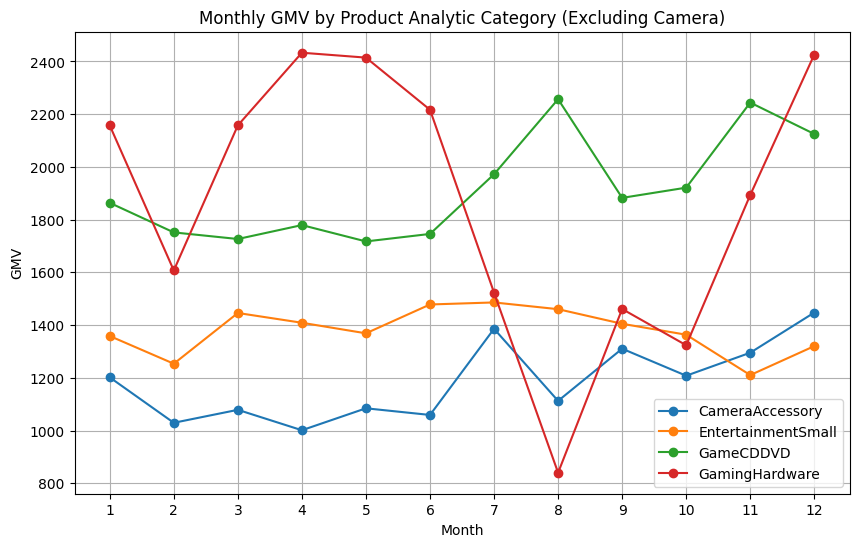

In [9]:
monthly_gmv_product_category = df2[df2['product_analytic_category'] != 'Camera'].groupby([df2['Month'], 'product_analytic_category'])['gmv'].mean()

plt.figure(figsize=(10, 6))

for category in monthly_gmv_product_category.unstack().columns:
    plt.plot(monthly_gmv_product_category.unstack().index, monthly_gmv_product_category.unstack()[category], 
             marker='o', linestyle='-', label=category)

plt.xlabel('Month')
plt.ylabel('GMV')
plt.title('Monthly GMV by Product Analytic Category (Excluding Camera)')
plt.xticks(monthly_gmv_product_category.unstack().index)
plt.legend()
plt.grid(True)
plt.show()

## Units(판매량) / 월별

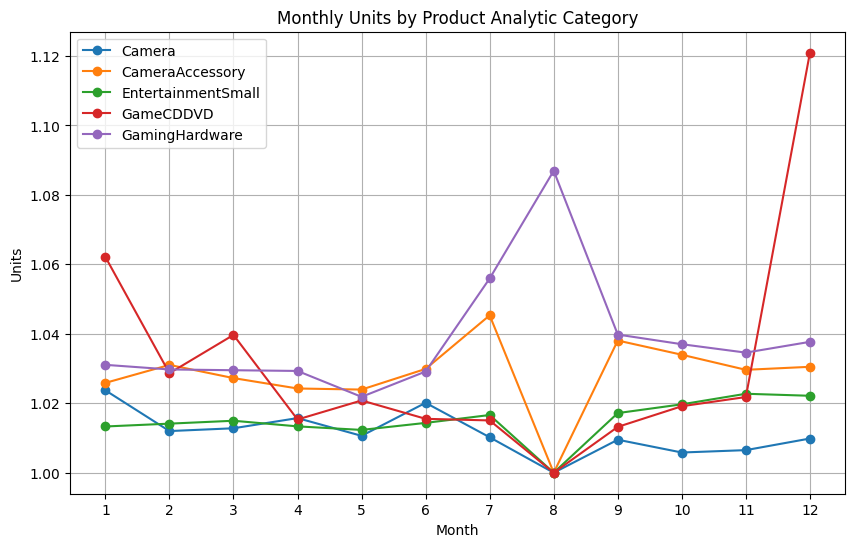

In [10]:
monthly_units_product_category = df2.groupby([df2['Month'], 'product_analytic_category'])['units'].mean()

plt.figure(figsize=(10, 6))

for category in monthly_units_product_category.unstack().columns:
    plt.plot(monthly_units_product_category.unstack().index, monthly_units_product_category.unstack()[category], 
             marker='o', linestyle='-', label=category)

plt.xlabel('Month')
plt.ylabel('Units')
plt.title('Monthly Units by Product Analytic Category')
plt.xticks(monthly_units_product_category.unstack().index)
plt.legend()
plt.grid(True)
plt.show()

## GMV(판매액) / 시간별(24시)

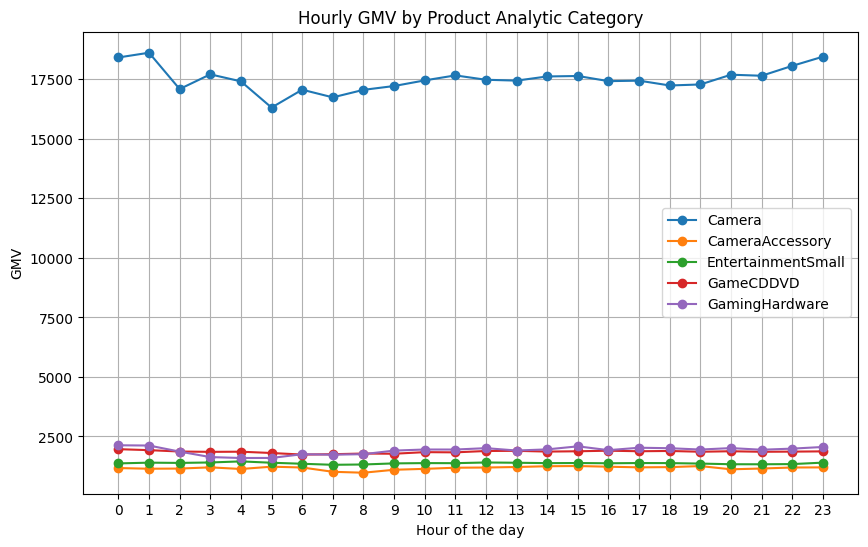

In [11]:
hourly_gmv_product_category = df2.groupby([df2['order_date'].dt.hour, 'product_analytic_category'])['gmv'].mean()

plt.figure(figsize=(10, 6))

for category in hourly_gmv_product_category.unstack().columns:
    plt.plot(hourly_gmv_product_category.unstack().index, hourly_gmv_product_category.unstack()[category], 
             marker='o', linestyle='-', label=category)

plt.xlabel('Hour of the day')
plt.ylabel('GMV')
plt.title('Hourly GMV by Product Analytic Category')
plt.xticks(hourly_gmv_product_category.unstack().index)
plt.legend()
plt.grid(True)
plt.show()

- 카메라 제외

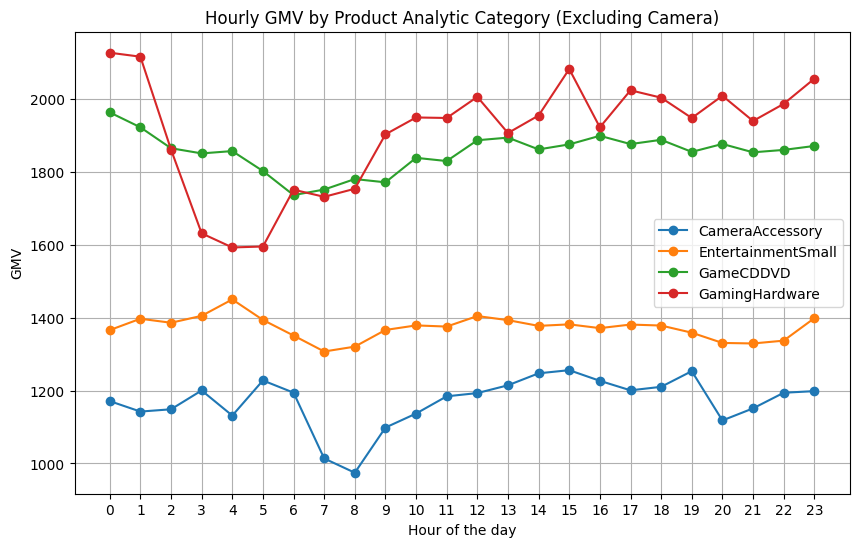

In [12]:
hourly_gmv_product_category = df2[df2['product_analytic_category'] != 'Camera'].groupby([df2['order_date'].dt.hour, 'product_analytic_category'])['gmv'].mean()

plt.figure(figsize=(10, 6))

for category in hourly_gmv_product_category.unstack().columns:
    plt.plot(hourly_gmv_product_category.unstack().index, hourly_gmv_product_category.unstack()[category], 
             marker='o', linestyle='-', label=category)

plt.xlabel('Hour of the day')
plt.ylabel('GMV')
plt.title('Hourly GMV by Product Analytic Category (Excluding Camera)')
plt.xticks(hourly_gmv_product_category.unstack().index)
plt.legend()
plt.grid(True)
plt.show()

## Units(판매량)product_analytic_category

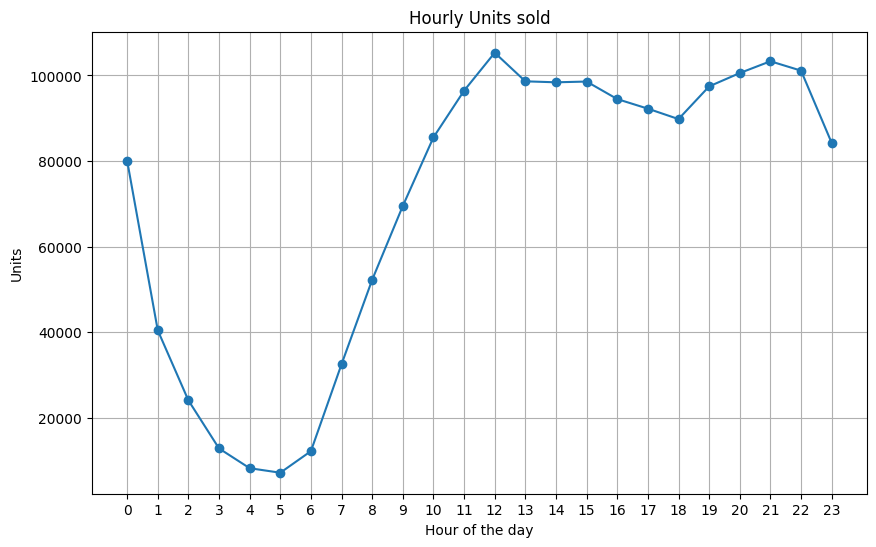

In [13]:
# 날짜별 gmv 데이터 추출
hourly_units = df2.groupby(df2['order_date'].dt.hour)['units'].sum()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(hourly_units.index, hourly_units.values, marker='o', linestyle='-')
plt.xlabel('Hour of the day')
plt.ylabel('Units')
plt.title('Hourly Units sold')
plt.xticks(hourly_units.index)
plt.grid(True)
plt.show()

## Units(판매량)product_analytic_category / 시간별(24시)

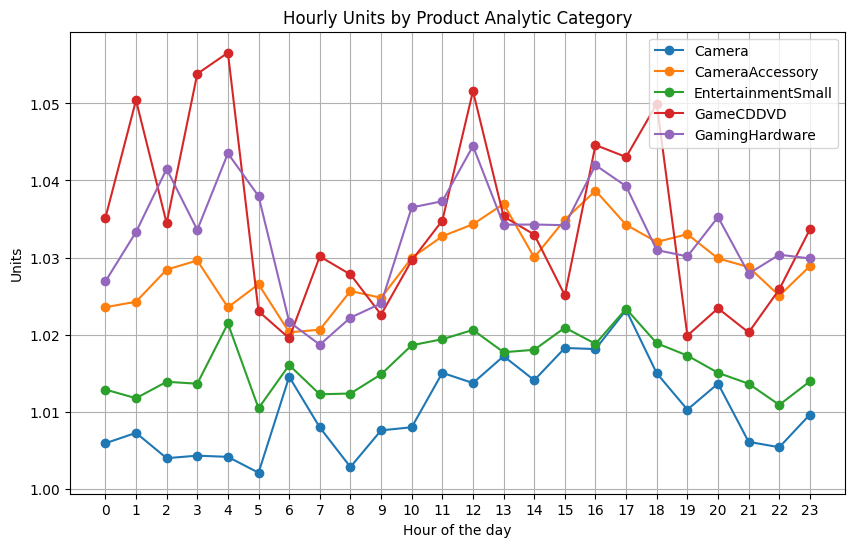

In [14]:
hourly_units_product_category = df2.groupby([df2['order_date'].dt.hour, 'product_analytic_category'])['units'].mean()

plt.figure(figsize=(10, 6))

for category in hourly_units_product_category.unstack().columns:
    plt.plot(hourly_units_product_category.unstack().index, hourly_units_product_category.unstack()[category], 
             marker='o', linestyle='-', label=category)

plt.xlabel('Hour of the day')
plt.ylabel('Units')
plt.title('Hourly Units by Product Analytic Category')
plt.xticks(hourly_units_product_category.unstack().index)
plt.legend()
plt.grid(True)
plt.show()

## Product 카테고리 별 GMV, Units

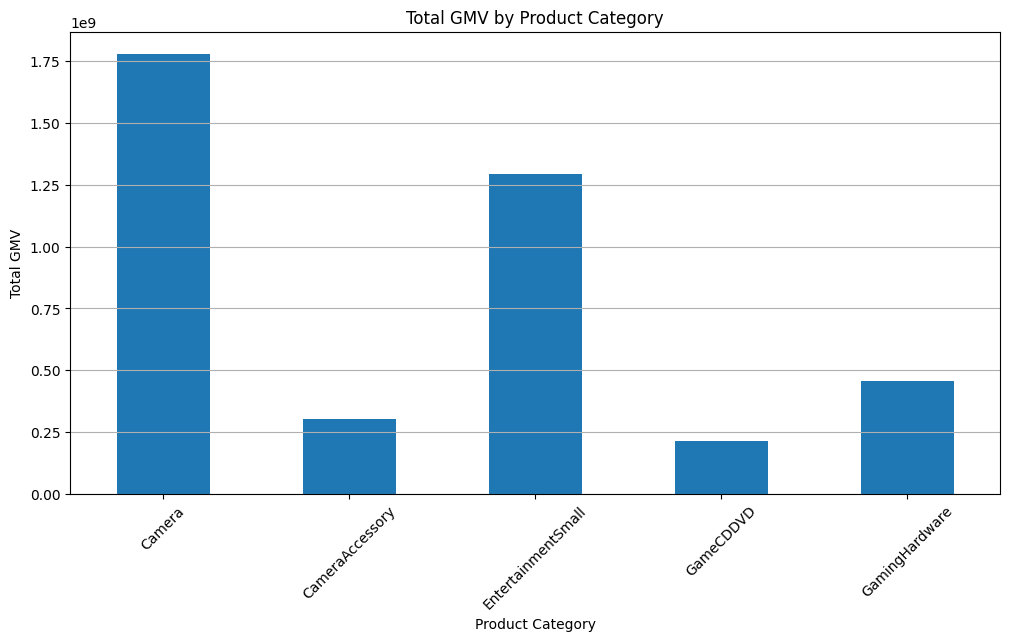

In [15]:
import matplotlib.pyplot as plt

category_gmv = df2.groupby('product_analytic_category')['gmv'].sum()

plt.figure(figsize=(12, 6))
category_gmv.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total GMV')
plt.title('Total GMV by Product Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

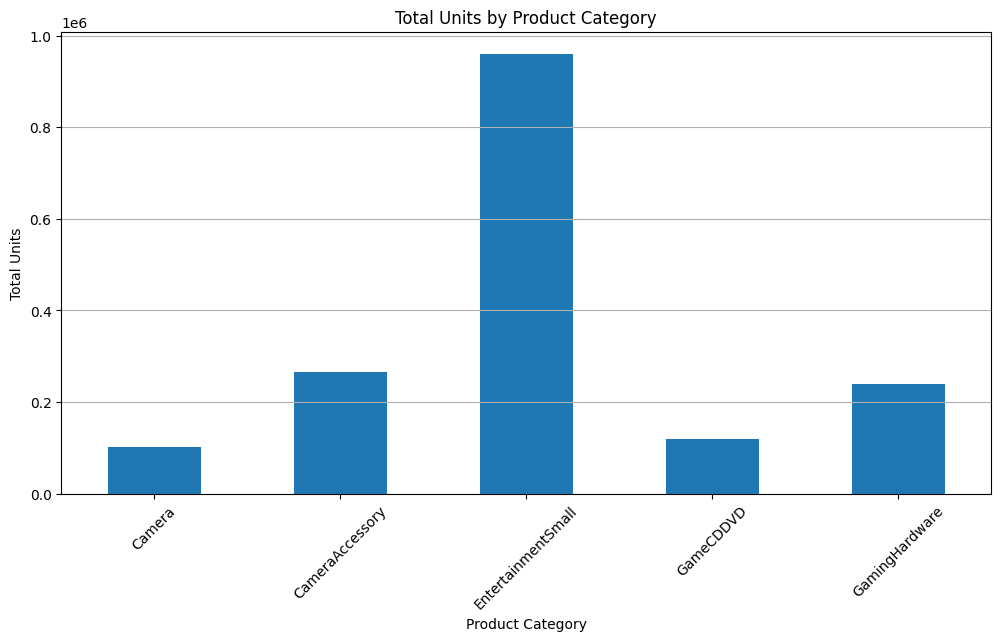

In [16]:
import matplotlib.pyplot as plt

category_units = df2.groupby('product_analytic_category')['units'].sum()

plt.figure(figsize=(12, 6))
category_units.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total Units')
plt.title('Total Units by Product Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Sub 카테고리 별 GMV, Units

In [17]:
print(df2['product_analytic_sub_category'].unique())

['CameraAccessory' 'GamingAccessory' 'Speaker' 'HomeAudio' 'CameraStorage'
 'AmplifierReceiver' 'AudioMP3Player' 'Game' 'Camera' 'GamingConsole'
 'HomeTheatre' 'AudioAccessory' 'TVVideoSmall' 'GameMembershipCards']


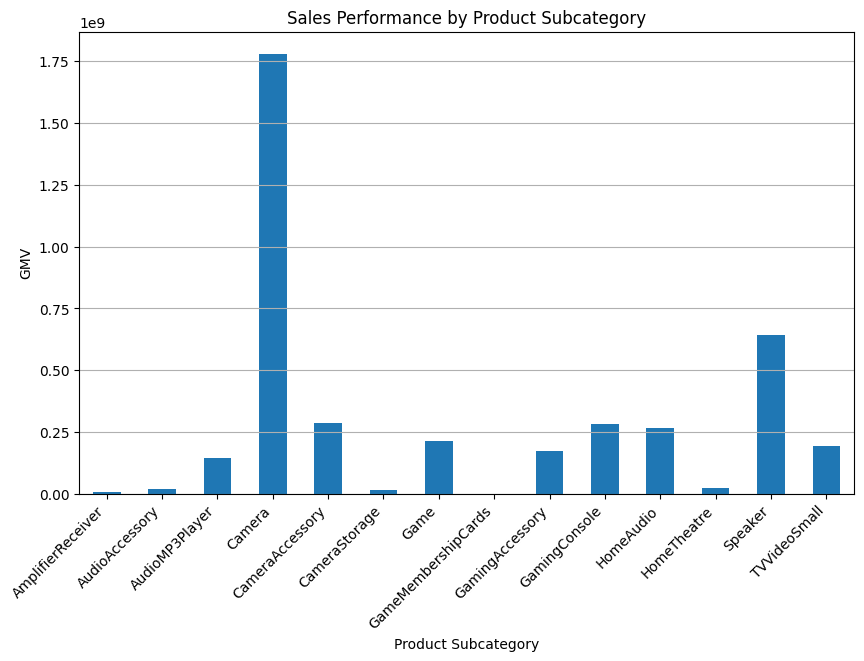

In [18]:
subcategory_sales = df2.groupby('product_analytic_sub_category')['gmv'].sum()

plt.figure(figsize=(10, 6))
subcategory_sales.plot(kind='bar')
plt.xlabel('Product Subcategory')
plt.ylabel('GMV')
plt.title('Sales Performance by Product Subcategory')
plt.xticks(rotation=45, ha='right')  # x 축 레이블을 오른쪽으로 45도 회전하여 표시
plt.grid(axis='y')
plt.show()

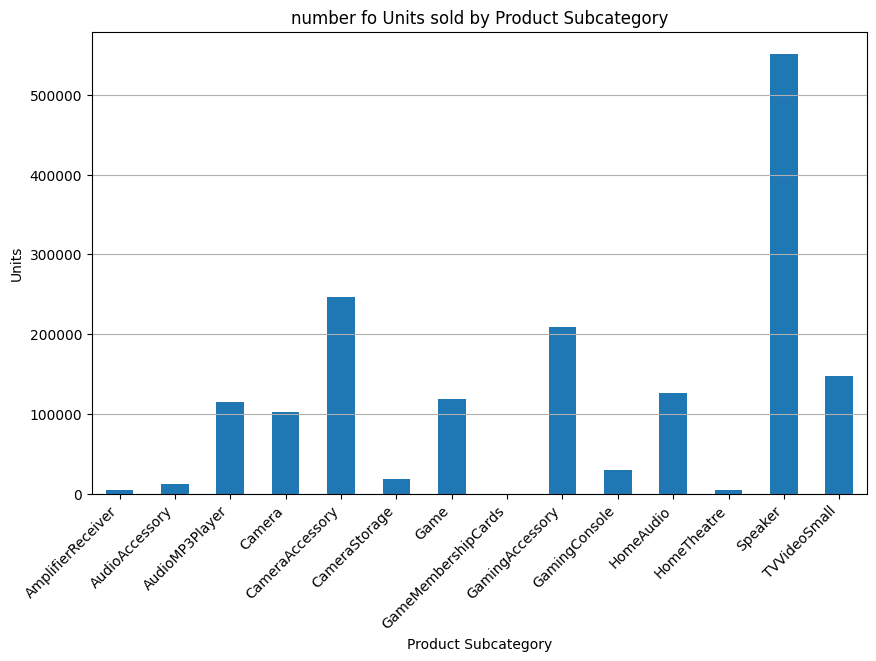

In [19]:
# 하위 카테고리별 판매 성능 계산
subcategory_sales = df2.groupby('product_analytic_sub_category')['units'].sum()

# 그래프 그리기
plt.figure(figsize=(10, 6))
subcategory_sales.plot(kind='bar')
plt.xlabel('Product Subcategory')
plt.ylabel('Units')
plt.title('number fo Units sold by Product Subcategory')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## 하위 카테고리 별 top10 GMV, Units

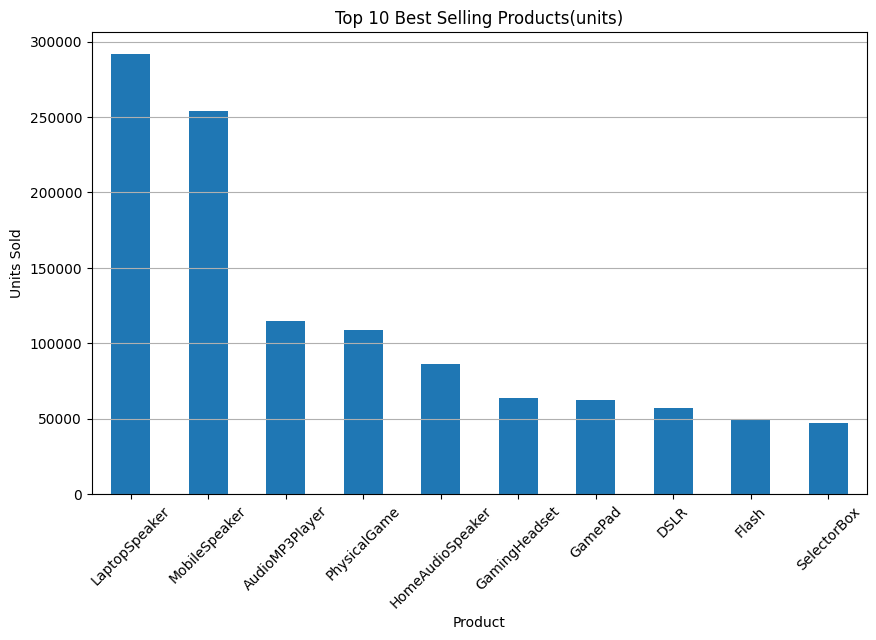

In [20]:
# 각 제품의 판매량 계산
product_sales = df2.groupby('product_analytic_vertical')['units'].sum()

# 판매량 기준으로 Top 10 제품 선택
top_10_products = product_sales.nlargest(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Top 10 Best Selling Products(units)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

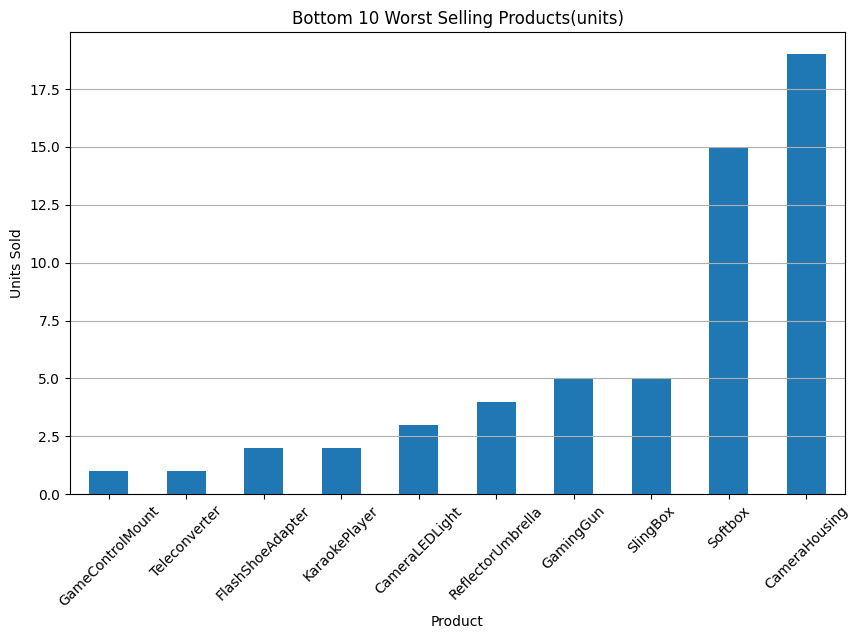

In [21]:
# 각 제품의 판매량 계산
product_sales = df2.groupby('product_analytic_vertical')['units'].sum()

# 판매량 기준으로 Bottom 10 제품 선택
bottom_10_products = product_sales.nsmallest(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
bottom_10_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Bottom 10 Worst Selling Products(units)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

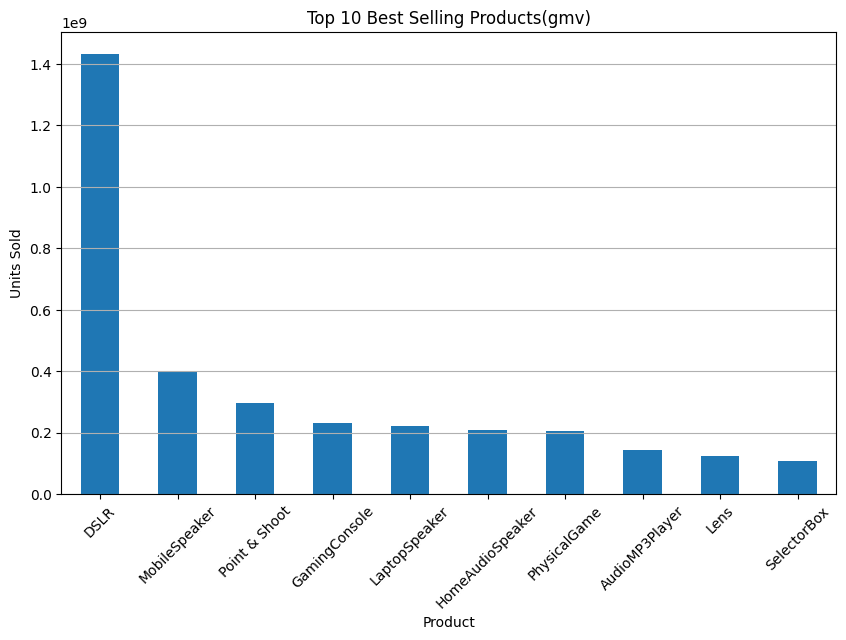

In [22]:
# 각 제품의 판매량 계산
product_sales = df2.groupby('product_analytic_vertical')['gmv'].sum()

# 판매량 기준으로 Top 10 제품 선택
top_10_products = product_sales.nlargest(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Top 10 Best Selling Products(gmv)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

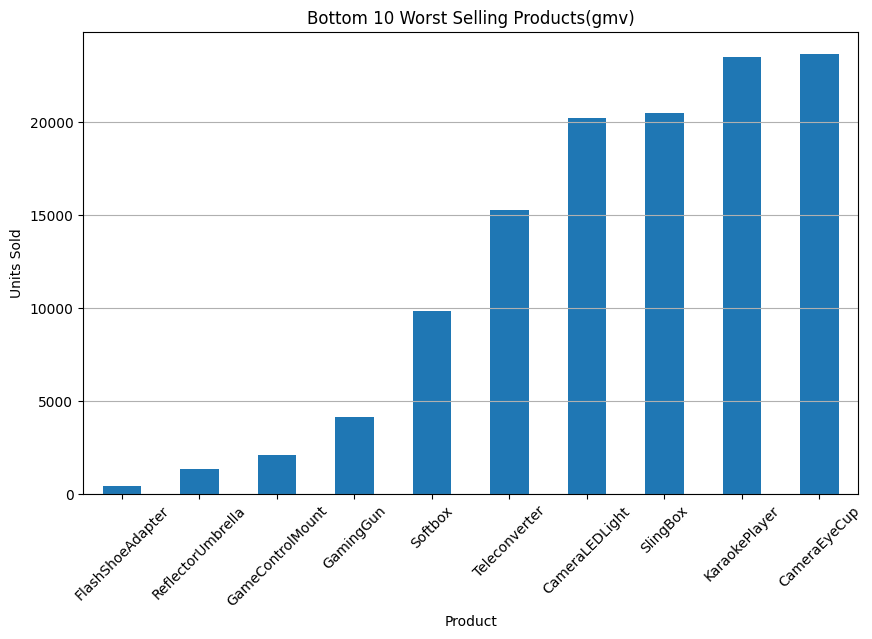

In [23]:
# 각 제품의 판매량 계산
product_sales = df2.groupby('product_analytic_vertical')['gmv'].sum()

# 판매량 기준으로 Bottom 10 제품 선택
bottom_10_products = product_sales.nsmallest(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
bottom_10_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Bottom 10 Worst Selling Products(gmv)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 고객 세그먼트

## Recency

In [24]:
# 0-3개월/4-6개월/7-12개월/13-24개월/25개월이상의 Recency 등급

current_date = pd.to_datetime('2016-07-25')

# 주문일자와 현재 날짜의 차이 계산
recency = current_date - df2['order_date']

# 등급 할당
def assign_recency_category(diff):
    if diff <= pd.Timedelta(days=90):
        return 5 #'0-3개월'
    elif diff <= pd.Timedelta(days=180):
        return 4 #'4-6개월'
    elif diff <= pd.Timedelta(days=365):
        return 3 #'7-12개월'
    elif diff <= pd.Timedelta(days=365*2):
        return 2 #'13-24개월'
    else:
        return 1 #'25개월 이상'

# 등급 할당 함수 적용
recency_category = recency.apply(assign_recency_category)

df2['Recency'] = recency_category
df2

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Recency
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1.0,\N,\N,...,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,3
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1.0,\N,\N,...,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,3
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1.0,\N,\N,...,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1.0,\N,\N,...,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1.0,\N,\N,...,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4.402170e+15,4.402170e+15,2200.0,1.0,\N,\N,...,7,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1.402393e+15,1.402393e+15,2098.0,1.0,\N,\N,...,10,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4.403460e+15,4.403460e+15,2098.0,1.0,\N,\N,...,5,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4.403860e+15,4.403860e+15,2200.0,1.0,\N,\N,...,3,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3


## Frequency

1. 1회 구매자들에게는 1등급을 준다.
2. 1등급을 제외하고, 남은 고객들의 빈도를 평균내어 평균보다 낮은 그룹에게 2등급을 준다.
3. 반복하여 4등급까지 만들고, 남은 고객들은 5등급을 할당한다.

In [27]:
kauft = df2.groupby('cust_id')['order_id'].count()
kauft1 = kauft[kauft == 1]
kauft1_cust = kauft1.index.tolist()

In [26]:
# 1회만 구매한 고객 제거
kauft1_cust_off = df2[~df2['cust_id'].isin(kauft1_cust)]
kauft1_cust_off

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Recency
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1.0,\N,\N,...,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1.0,\N,\N,...,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,3
5,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1.0,\N,\N,...,5,-7.64154636189174E+018,-1.91905269756031E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,3
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2.417870e+15,2.417870e+15,0.0,1.0,\N,\N,...,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,3
10,ACCCX3S5JGAJETYR,2015-10-19 09:37:06,2015,10,2.420829e+15,2.420829e+15,3695.0,1.0,\N,\N,...,8,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4.402170e+15,4.402170e+15,2200.0,1.0,\N,\N,...,7,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1.402393e+15,1.402393e+15,2098.0,1.0,\N,\N,...,10,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4.403460e+15,4.403460e+15,2098.0,1.0,\N,\N,...,5,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4.403860e+15,4.403860e+15,2200.0,1.0,\N,\N,...,3,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3


In [28]:
# 2회 이상 구매 고객 중 비율 파악 후 평균값 미만 걸러내기
kauft1_cust_off.groupby('cust_id')['order_id'].count().mean()
# 2.4692804287471706 까지 걸러내기

2.4692804287471706

In [29]:
kauft2_on = kauft1_cust_off.groupby('cust_id')['order_id'].count()
kauft2 = kauft2_on[kauft2_on == 2] 
kauft2_cust = kauft2.index.tolist()

In [30]:
# 2회만 구매한 고객 제거
kauft2_cust_off = kauft1_cust_off[~kauft1_cust_off['cust_id'].isin(kauft2_cust)]
kauft2_cust_off

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Recency
5,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1.0,\N,\N,...,5,-7.64154636189174E+018,-1.91905269756031E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,3
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2.417870e+15,2.417870e+15,0.0,1.0,\N,\N,...,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,3
12,ACCCX3SG2GG9YYAH,2015-10-10 22:10:51,2015,10,3.413503e+15,3.413503e+15,6750.0,1.0,\N,\N,...,5,-2.16791353432751E+018,-7.70816034119555E+018,CE,CameraAccessory,CameraAccessory,Lens,7150,0,3
14,ACCCX3SG2GG9YYAH,2015-10-14 21:26:55,2015,10,3.416931e+15,3.416931e+15,6750.0,1.0,\N,\N,...,2,7.1891021620877E+018,-4.38381186511431E+018,CE,CameraAccessory,CameraAccessory,Lens,7150,0,3
17,ACCCX3SG2GG9YYAH,2015-10-16 23:11:15,2015,10,2.418725e+15,2.418725e+15,6670.0,1.0,\N,\N,...,9,-5.89773718572733E+018,7.22661604040752E+018,CE,CameraAccessory,CameraAccessory,Lens,7150,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648797,VPLEYAP3ZYYUVESU,2015-09-12 08:31:37,2015,9,1.388820e+15,1.388820e+15,2018.0,1.0,\N,\N,...,8,-2.90531870082615E+018,-1.06475227788338E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648803,VPLEYAP3ZYYUVESU,2015-09-21 12:34:35,2015,9,4.396742e+15,4.396742e+15,2069.0,1.0,\N,\N,...,8,2.73160035770457E+018,4.3985308426507E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648810,VPLEYAP3ZYYUVESU,2015-09-27 16:30:39,2015,9,4.402069e+15,4.402069e+15,2200.0,1.0,\N,\N,...,8,6.3303263366528E+017,6.14822284391839E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648811,VPLEYAP3ZYYUVESU,2015-09-02 17:49:38,2015,9,2.378843e+15,2.378843e+15,2300.0,1.0,\N,\N,...,5,-2.46294208000453E+018,-4.83832468968218E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3


In [32]:
# 3회 이상 구매 고객 중 비율 파악 후 평균값 미만 걸러내기
kauft2_cust_off.groupby('cust_id')['order_id'].count().mean()
# 4.02980419895187 걸러내기

4.02980419895187

In [33]:
kauft4_on = kauft2_cust_off.groupby('cust_id')['order_id'].count()
kauft4 = kauft4_on[kauft4_on <= 4] 
kauft4_cust = kauft4.index.tolist()

In [34]:
# 4회이하 구매한 고객 제거
kauft4_cust_off = kauft2_cust_off[~kauft2_cust_off['cust_id'].isin(kauft4_cust)]
kauft4_cust_off

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Recency
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2.417870e+15,2.417870e+15,0.0,1.0,\N,\N,...,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,3
42,ACCCX3SG2GG9YYAH,2015-10-13 21:31:28,2015,10,2.416073e+15,2.416073e+15,6750.0,1.0,\N,\N,...,7,-4.11714181332307E+018,-4.35823435036496E+018,CE,CameraAccessory,CameraAccessory,Lens,7150,0,3
52,ACCCX3SGAR6NNBMR,2015-10-23 21:57:34,2015,10,2.424729e+15,2.424729e+15,6589.0,1.0,\N,\N,...,3,-7.45141534040965E+017,4.70560705115469E+018,CE,CameraAccessory,CameraAccessory,Lens,7150,5,3
64,ACCCX3SGAR6NNBMR,2015-10-21 13:14:03,2015,10,3.422686e+15,3.422686e+15,6532.0,1.0,\N,\N,...,5,-6.28212504476564E+018,4.80269361359958E+018,CE,CameraAccessory,CameraAccessory,Lens,7150,5,3
65,ACCCX3SGAR6NNBMR,2015-10-04 07:06:15,2015,10,3.407772e+15,3.407772e+15,6480.0,1.0,\N,\N,...,9,-5.81902836645889E+018,7.34649716669351E+018,CE,CameraAccessory,CameraAccessory,Lens,7150,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648735,VPLEAFCSDSGDN3MQ,2015-09-02 20:44:24,2015,9,2.378843e+15,2.378843e+15,2090.0,1.0,\N,\N,...,3,-8.71176438785604E+017,1.57277438709267E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,1990,5,3
1648746,VPLEYAP3ZYYUVESU,2015-09-14 15:52:49,2015,9,1.390813e+15,1.390813e+15,2068.0,1.0,\N,\N,...,8,5.38046530691241E+018,-7.38325439102968E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648774,VPLEYAP3ZYYUVESU,2015-09-02 13:28:35,2015,9,2.378843e+15,2.378843e+15,2190.0,1.0,\N,\N,...,4,2.83390596409271E+017,5.98299553675522E+017,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3
1648811,VPLEYAP3ZYYUVESU,2015-09-02 17:49:38,2015,9,2.378843e+15,2.378843e+15,2300.0,1.0,\N,\N,...,5,-2.46294208000453E+018,-4.83832468968218E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3


In [35]:
# 5회 이상 구매 고객 중 비율 파악 후 평균값 미만 걸러내기
kauft4_cust_off.groupby('cust_id')['order_id'].count().mean()
# 7.329792063924453걸러내기

7.329792063924453

In [36]:
kauft7_on = kauft4_cust_off.groupby('cust_id')['order_id'].count()
kauft7 = kauft7_on[kauft7_on <= 7] 
kauft7_cust = kauft7.index.tolist()

In [37]:
# 7회이하 구매한 고객 제거
kauft7_cust_off = kauft4_cust_off[~kauft4_cust_off['cust_id'].isin(kauft7_cust)]
kauft7_cust_off

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Recency
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2.417870e+15,2.417870e+15,0.0,1.0,\N,\N,...,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,3
95,ACCCX3SGAR6NNBMR,2015-10-05 13:25:48,2015,10,2.408842e+15,2.408842e+15,0.0,1.0,\N,\N,...,3,,,CE,CameraAccessory,CameraAccessory,Lens,7150,5,3
124,ACCCX3SGDGPZAQXD,2015-10-16 01:49:30,2015,10,4.417909e+15,4.417909e+15,0.0,1.0,\N,\N,...,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5,3
142,ACCCX3SGDGPZAQXD,2015-10-16 22:59:20,2015,10,4.418717e+15,4.418717e+15,0.0,1.0,\N,\N,...,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5,3
181,ACCCX3SGDGPZAQXD,2015-10-30 17:16:30,2015,10,3.430603e+15,3.430603e+15,8499.0,1.0,\N,\N,...,5,-9.7963617593006E+017,2.89445925710224E+018,CE,CameraAccessory,CameraAccessory,Lens,17995,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648680,VPLE9U62HNHMKDZV,2015-09-06 20:07:50,2015,9,3.381988e+15,3.000373e+17,3698.0,1.0,\N,\N,...,6,2.98909303118638E+018,-3.36485054037295E+017,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,6990,4,3
1648690,VPLE9U62XWVEGNUU,2015-09-23 07:29:10,2015,9,4.398276e+15,4.398276e+15,3298.0,1.0,\N,\N,...,15,-4.61461084752475E+018,-6.65548927804112E+017,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,6490,4,3
1648710,VPLE9WVTPGFJAVMV,2015-09-02 22:02:40,2015,9,2.378843e+15,2.378843e+15,4899.0,1.0,\N,\N,...,4,-7.07719797532515E+018,5.96900868098173E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,4999,2,3
1648735,VPLEAFCSDSGDN3MQ,2015-09-02 20:44:24,2015,9,2.378843e+15,2.378843e+15,2090.0,1.0,\N,\N,...,3,-8.71176438785604E+017,1.57277438709267E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,1990,5,3


In [38]:
# 각 구매건수로 등급 나누기
# 등급 할당 함수 정의
def assign_Freqeuncy_category(row):
    if row['cust_id'] in kauft1:
        return 1 # 구매건 1
    elif row['cust_id'] in kauft2:
        return 2 # 구매건 2
    elif row['cust_id'] in kauft4:
        return 3 # 구매건 3
    elif row['cust_id'] in kauft7:
        return 4 # 구매건 4
    else:
        return 5
    
# 등급 할당 함수 적용
df2['Frequency'] = df2.apply(assign_Freqeuncy_category, axis=1)
df2

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Recency,Frequency
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1.0,\N,\N,...,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,3,1
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1.0,\N,\N,...,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,3,2
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1.0,\N,\N,...,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,3,1
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1.0,\N,\N,...,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,3,2
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1.0,\N,\N,...,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4.402170e+15,4.402170e+15,2200.0,1.0,\N,\N,...,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3,2
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1.402393e+15,1.402393e+15,2098.0,1.0,\N,\N,...,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3,2
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4.403460e+15,4.403460e+15,2098.0,1.0,\N,\N,...,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3,2
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4.403860e+15,4.403860e+15,2200.0,1.0,\N,\N,...,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,3,2


## Monetary
5등급에 속한 5명의 고객이 총 100만원의 매출을 만들었다면</br>
1등급은 100명의 고객이 100만원의 매출을 만드는 식으로 할당

In [39]:
purchase_count_per_customer = df2.groupby('cust_id').size()
purchase_count_per_customer

cust_id
-9223350545281059840.0    1
-9223333073734540288.0    1
-9223295751646400512.0    1
-9223238858163860480.0    1
-9223228748575550464.0    1
                         ..
 9.99981511652021E+017    2
 904605071348172          1
 91585485558415           3
 921862207165158          1
 990888630134913          1
Length: 1253495, dtype: int64

In [40]:
import numpy as np

# 빈 문자열을 NaN으로 대체
df2['gmv'] = df2['gmv'].replace(' ', np.nan)

# NaN이 아닌 값만 선택하여 부동 소수점 수로 변환
df2['gmv'] = df2['gmv'].dropna().astype(float)
df2['gmv']

0          6400.0
1          6900.0
2          1990.0
3          1690.0
4          1618.0
            ...  
1648819    2200.0
1648820    2098.0
1648821    2098.0
1648822    2200.0
1648823    2295.0
Name: gmv, Length: 1648824, dtype: float64

In [41]:
df2['total_gmv'] = df2['gmv']*df2['units']
result = df2.groupby('cust_id')['total_gmv'].sum()
result_df = pd.DataFrame(result)

In [42]:
result_df.info()
result_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1253495 entries, -9.22335054528106e+18 to 990888630134913
Data columns (total 1 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   total_gmv  1253495 non-null  float64
dtypes: float64(1)
memory usage: 19.1+ MB


,total_gmv
count,1.253495e+06
mean,3.378406e+03
std,1.284669e+04
min,0.000000e+00
25%,3.900000e+02
50%,9.280000e+02
75%,2.485000e+03
max,4.425309e+06


In [ ]:
result_df = result_df.sort_values(by='total_gmv', ascending=False)
result_df

In [ ]:
result_df.info()

In [ ]:
# 총 매출의 80% 계산
total_gmv_80_percent = result_df['total_gmv'].sum() * 0.8

# 총 매출이 누적될 때까지 고객의 수를 셈
total_gmv = 0
num_customers = 0
for idx, row in result_df.iterrows():
    total_gmv += row['total_gmv']
    num_customers += 1
    if total_gmv >= total_gmv_80_percent:
        break
        
print("총 매출의 80%:", total_gmv_80_percent)
print("총 매출의 80%를 차지하는 고객의 수:", num_customers)

In [ ]:
# 상위 279,594명의 고객 추출
top_customers = result_df.head(279594)
top_customer_ids = top_customers.index.tolist()

# 나머지 고객 추출
remaining_customers = result_df[~result_df.index.isin(top_customers.index)]

# 결과 확인
remaining_customers

In [ ]:
result_df.loc[result_df.index.isin(top_customer_ids), 'rank'] = 5
result_df

In [ ]:
remaining_customers['M_Score'] = pd.qcut(remaining_customers['total_gmv'], 4, labels=[1, 2, 3, 4])

remaining_customers

In [ ]:
# remaining_customers DataFrame에서 M_Score 열의 값이 4인 행의 인덱스를 가져옵니다.
remaining_customers_with_rank_4 = remaining_customers[remaining_customers['M_Score'] == 4].index

# result_df에서 인덱스가 remaining_customers_with_rank_4에 포함된 행의 rank를 4로 설정합니다.
result_df.loc[result_df.index.isin(remaining_customers_with_rank_4), 'rank'] = 4

In [ ]:
# remaining_customers DataFrame에서 M_Score 열의 값이 4인 행의 인덱스를 가져옵니다.
remaining_customers_with_rank_3 = remaining_customers[remaining_customers['M_Score'] == 3].index

# result_df에서 인덱스가 remaining_customers_with_rank_4에 포함된 행의 rank를 4로 설정합니다.
result_df.loc[result_df.index.isin(remaining_customers_with_rank_3), 'rank'] = 3

result_df[result_df['rank']==3].count()

In [ ]:
# remaining_customers DataFrame에서 M_Score 열의 값이 4인 행의 인덱스를 가져옵니다.
remaining_customers_with_rank_2 = remaining_customers[remaining_customers['M_Score'] == 2].index

# result_df에서 인덱스가 remaining_customers_with_rank_4에 포함된 행의 rank를 4로 설정합니다.
result_df.loc[result_df.index.isin(remaining_customers_with_rank_2), 'rank'] = 2

result_df[result_df['rank']==2].count()

In [ ]:
# remaining_customers DataFrame에서 M_Score 열의 값이 4인 행의 인덱스를 가져옵니다.
remaining_customers_with_rank_1 = remaining_customers[remaining_customers['M_Score'] == 1].index

# result_df에서 인덱스가 remaining_customers_with_rank_4에 포함된 행의 rank를 4로 설정합니다.
result_df.loc[result_df.index.isin(remaining_customers_with_rank_1), 'rank'] = 1

result_df[result_df['rank']==1].count()

In [ ]:
print(result_df[result_df['rank']==5].count())
print(result_df[result_df['rank']==4].count())
print(result_df[result_df['rank']==3].count())
print(result_df[result_df['rank']==2].count())
print(result_df[result_df['rank']==1].count())

In [ ]:
df2 = pd.merge(df2, result_df[['rank']], left_on='cust_id', right_index=True, how='left')

In [ ]:
df2['rank'].astype(int)

In [ ]:
df2 = df2.rename(columns={'rank': 'monetary'})
df2

In [ ]:
df2.info()

In [ ]:
df2['monetary'].astype(int)

In [ ]:
# 각 점수를 더하여 새로운 컬럼 생성
df2['rfm_score_sum'] = df2['Recency'] + df2['Frequency'] + df2['monetary']

In [ ]:
# Min-Max 스케일링 적용
min_score = df2['rfm_score_sum'].min()
max_score = df2['rfm_score_sum'].max()
df2['scaled_rfm_score_sum'] = (df2['rfm_score_sum'] - min_score) / (max_score - min_score)

# 5등분으로 나누어 고객 등급 할당
df2['customer_grade'] = pd.cut(df2['scaled_rfm_score_sum'], bins=5, labels=['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])
df2

In [ ]:
#등급별 고객수
df2.groupby('customer_grade')['cust_id'].nunique()

In [ ]:
# 등급별 고객 수 시각화

import matplotlib.pyplot as plt

# 각 고객 등급별 고객 수 계산
customer_grade_counts = df2['customer_grade'].value_counts()

# 전체 고객 수 계산
total_customers = customer_grade_counts.sum()

# 각 등급의 비율 계산
customer_grade_ratios = customer_grade_counts / total_customers

# 그래프 그리기
plt.figure(figsize=(8, 6))
customer_grade_ratios.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightgrey'])
plt.title('Customer Grade Distribution')
plt.xlabel('Customer Grade')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df2['order_date'].min())
print(df2['order_date'].max())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 월별로 고객 등급에 따른 구매 비율을 계산합니다.
purchase_count_by_grade_and_date = df2.groupby([pd.Grouper(key='order_date', freq='M'), 'customer_grade']).size().unstack(fill_value=0)

# 비율로 변환합니다.
purchase_count_by_grade_and_date_ratio = purchase_count_by_grade_and_date.div(purchase_count_by_grade_and_date.sum(axis=1), axis=0)

# 시각화하여 나타냅니다.
purchase_count_by_grade_and_date_ratio.plot(kind='bar', stacked=True)
plt.title('Monthly Purchase Count by Customer Grade')
plt.xlabel('Date')
plt.ylabel('Purchase Count Ratio')
#plt.xticks(rotation=45)
plt.legend(title='Customer Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## NPS 점수와 고객 세그먼트 관련성 분석

In [ ]:
# 매 달 구매건수
purchase_counts = []
for month in range(1,13):
    purchase_cnt_month = len(df2[df2['Month'] == month ]['cust_id'])
    purchase_counts.append(purchase_cnt_month)
    
# 결과 출력
for month, count in enumerate(purchase_counts, start=1): 
    print(f'월별 구매건수 (Month {month}): {count}')   

purchase_counts

In [ ]:
purchase_counts_df = pd.DataFrame(purchase_counts, columns=['Purchase Count'], index=range(1, 13))
purchase_counts_df['Month'] = ['2016-1','2016-2','2016-3','2016-4','2016-5','2016-6','2015-7','2015-8','2015-9','2015-10','2015-11','2015-12']
purchase_counts_df['Month'] = pd.to_datetime(purchase_counts_df['Month'])

# 결과 출력
print(purchase_counts_df)

In [ ]:
data = {'NPS' : [54.6,60.0,46.9,44.4,47.0,45.8,47.1,50.3,49.0,51.8,47.3,50.5],
       'Month' : ['2015-7','2015-8','2015-9','2015-10','2015-11','2015-12','2016-1','2016-2','2016-3','2016-4','2016-5','2016-6']}
NPS = pd.DataFrame(data)
NPS['Month'] = pd.to_datetime(NPS['Month'])
NPS

In [ ]:
NPS_df = pd.merge(NPS, purchase_counts_df, on='Month', how='inner')  # ID 열을 기준으로 inner join
NPS_df

In [ ]:
import matplotlib.pyplot as plt


# 이중 축으로 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 축에 NPS 그래프 그리기
ax1.plot(NPS_df['Month'], NPS_df['NPS'], marker='o', linestyle='-', color='b', label='NPS')
ax1.set_xlabel('Month')
ax1.set_ylabel('NPS', color='b')
ax1.tick_params('y', colors='b')

# 두 번째 축에 구매건수 그래프 그리기
ax2 = ax1.twinx()
ax2.plot(NPS_df['Month'], NPS_df['Purchase Count'], marker='s', linestyle='--', color='r', label='Purchase Count')
ax2.set_ylabel('Purchase Count', color='r')
ax2.tick_params('y', colors='r')



# 그래프 제목 및 범례 추가
plt.title('NPS and Purchase Count over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df2['order_month'] = pd.to_datetime(df2['order_date'], format='%Y%m')
df2

In [ ]:
df2['order_month'] = df2['order_month'].dt.to_period('M')

In [ ]:
# 월별 세그먼트별 구매 건수 계산
monthly_segment_purchase = df2.groupby(['order_month', 'customer_grade']).size().unstack(fill_value=0)
monthly_segment_purchase

In [ ]:
# 각 세그먼트별 구매 건수를 전체 구매 건수로 나누어 비율 계산
monthly_segment_purchase_ratio = monthly_segment_purchase.div(monthly_segment_purchase.sum(axis=1), axis=0)

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))
monthly_segment_purchase_ratio.plot(kind='bar', stacked=True)
plt.title('월별 세그먼트별 구매 건수 비율')
plt.xlabel('주문 완료 월')
plt.ylabel('구매 건수 비율')
plt.xticks(rotation=45)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## NPS와 고객 세그먼트 상관관계

In [ ]:
df3

In [ ]:
data = {'NPS' : [54.6,60.0,46.9,44.4,47.0,45.8,47.1,50.3,49.0,51.8,47.3,50.5],
       'order_month' : ['201507','201508','201509','201510','201511','201512','201601','201602','201603','201604','201605','201606']}
NPS = pd.DataFrame(data)
NPS['order_month'] = pd.to_datetime(NPS['order_month'], format='%Y%m')

NPS.info()
NPS

In [ ]:
segment_kauft = pd.DataFrame(monthly_segment_purchase_ratio)
segment_kauft['NPS'] = [0,0,54.6,60.0,46.9,44.4,47.0,45.8,47.1,50.3,49.0,51.8,47.3,50.5,0]

In [ ]:
segment_kauft

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
segment_kauft.plot(kind='bar', stacked=True)
plt.title('Monthly Purchase Ratio by Grade')
plt.xlabel('Order Month')
plt.ylabel('Purchase Ratio')
plt.xticks(rotation=45)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 세그먼트 기준

- → 위의 기준대로 고객군별 RFM 점수와 특징을 정리한 표는 다음과 같습니다.

| 고객군 | rfm_score_sum |
| --- | --- |
| grade 5 | 12-15|
| grade 4 | 9-12|
| grade 3 | 6-9|
| grade 2 | 3-6|
| grade 1 | 0-3|

## 피어슨 상관관계

In [ ]:
# 피어슨 상관 계수를 계산합니다
correlation = segment_kauft.corr()

# NPS와 각 Grade 간의 상관 관계를 출력합니다
print(correlation['NPS'])

In [ ]:
from scipy.stats import pearsonr

# segment_kauft DataFrame의 첫 15개 행과 'NPS' 열 선택
segment_kauft_subset = segment_kauft.iloc[:15]
nps_column = segment_kauft_subset['NPS']

# 피어슨 상관계수와 p-value 계산
corr, p_value = pearsonr(segment_kauft_subset['Grade 3'], nps_column)

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.6161465758863753
p-value: 0.014450028694684095

p-value가 0.05보다 낮게 나왔음 -> 유의미한 상관관계

#### grade_3

NPS점수의 유의미한 긍정적인 영향을 준 고객 세그먼트</br>
고객 심층 분석

In [ ]:
grade3_df = df2[df2['customer_grade']== 'Grade 3']
grade3_df

In [ ]:
grade3_df.info()

#### 세부 분석 내용
* 구매빈도 및 주기분석
* 구매 금액 분석
* 크로스-판매 및 업셀링분석
* 구매유형 분류

In [ ]:
# 평균 구매 빈도
purchase_frequency = grade3_df.groupby('cust_id').size()
average_purchase_frequency = purchase_frequency.mean()
average_purchase_frequency

In [ ]:
grade3_df['order_day'] = pd.to_datetime(grade3_df['order_date']).dt.date
grade3_df

In [ ]:
# 첫구매가 일어난 날
first_purchase_date = grade3_df.groupby('cust_id')['order_day'].min()
purchase_count_by_date = first_purchase_date.value_counts()
purchase_count_by_date.head(10)

## 구매금액

In [ ]:
total_gmv = df2.groupby('cust_id')['total_gmv'].sum()
grade3_total_gmv = grade3_df.groupby('cust_id')['total_gmv'].sum()
print('total_gmv:', total_gmv.mean())
print('grade3_total_gmv:', grade3_total_gmv.mean())
# 전체 평균 구매 금액보다 grade3등급의 고객들의 평균 구매 금액이 높다

In [ ]:
#각 카테고리별 상품 평균 금액
print(df2.groupby('product_analytic_category')['gmv'].mean())
print(df2.groupby('product_analytic_sub_category')['gmv'].mean())

In [ ]:
# 뭘 그렇게 샀을까?
grade3_df.groupby('product_analytic_category')['cust_id'].size()
#EntertainmentSmall에서 유독 많이 구매가 일어남

In [ ]:
# Grade3 카테고리별 구매량 시각화

import matplotlib.pyplot as plt

# 데이터 준비
category_counts = grade3_df.groupby('product_analytic_category')['cust_id'].size()
category_counts = category_counts.sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Number of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# EntertainmentSmall 카테고리의 하부 카테고리 필터링
entertainment_small_subset = grade3_df[grade3_df['product_analytic_category'] == 'EntertainmentSmall']

# 하부 카테고리별 구매량 확인
entertainment_small_sub_category_counts = entertainment_small_subset['product_analytic_sub_category'].value_counts()
print(entertainment_small_sub_category_counts)

In [ ]:
# Grade3 하부카테고리별 구매량
import matplotlib.pyplot as plt

# 데이터 준비
category_counts = grade3_df.groupby('product_analytic_category')['cust_id'].size()
category_counts = category_counts.sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Number of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# product_analytic_sub_category로 더 파고들어가서 분석
grade3_df.groupby('product_analytic_sub_category')['cust_id'].size()
#Speaker가 유독 인기 -> grade3등급에서만 인기 있는건지?

In [ ]:
# 각 카테고리별 상품 개수
category_grade3 = grade3_df.groupby('product_analytic_sub_category')['product_analytic_vertical'].value_counts()
category_df2 = df2.groupby('product_analytic_sub_category')['product_analytic_vertical'].value_counts()

print(category_grade3)

## 크로스 판매 업셀링 분석

In [ ]:
# # 고객별로 구매한 상품 목록을 하나의 문자열로 가지고 있는 데이터프레임 생성
 customer_product_list_df = grade3_df.groupby('cust_id')['product_analytic_vertical'].apply(lambda x: ','.join(x)).reset_index()

# # 문자열을 쉼표로 분리하여 각 상품을 별도의 컬럼으로 만들기
 customer_product_list_df = customer_product_list_df.join(customer_product_list_df['product_analytic_vertical'].str.split(',', expand=True).add_prefix('product_'))

# # 기존 컬럼 삭제
 customer_product_list_df.drop(columns=['product_analytic_vertical'], inplace=True)
    
# 결과 확인
#print(customer_product_list_df)

In [ ]:
# #customer_product_list_df = pd.DataFrame(customer_product_list_df)
 customer_product_list_df.drop(columns=['cust_id'], inplace=True)
#customer_product_list_df

In [ ]:
# 데이터프레임을 CSV 파일로 저장
#customer_product_list_df.to_csv('customer_product_list_df.csv', index=False)

In [ ]:
# 각 행에 적용할 함수 정의
def remove_duplicates(row):
    return list(set(row))

# apply 메서드를 사용하여 각 행에 함수 적용
unique_products_df = customer_product_list_df.apply(remove_duplicates, axis=1)

# 결과 확인
#print(unique_products_df)

In [ ]:
# 데이터프레임 내의 모든 리스트에서 None 값을 제거하는 함수 정의
def remove_none(lst):
    return [item for item in lst if item is not None]

# apply 메서드를 사용하여 각 행에 적용
cleaned_data = unique_products_df.apply(remove_none)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# 데이터프레임을 리스트의 리스트로 변환
transactions = cleaned_data.values.tolist()

# TransactionEncoder를 사용하여 트랜잭션 인코딩 적용
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# 결과를 데이터프레임으로 변환
te_df = pd.DataFrame(te_ary, columns=te.columns_)

# 결과 확인
#print(te_df)

In [ ]:
# 연관규칙분석을 위한 전처리 완료
te_df

##### 구매규칙분석
apriori를 사용한 규칙탐색

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemset = apriori(te_df, min_support=0.003, max_len=3, use_colnames=True)

frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset.sort_values('support', ascending=False, inplace=True)

In [ ]:
frequent_itemset

In [ ]:
# 2개이상
frequent_itemset[frequent_itemset['length']>=2].head()

In [ ]:
##상위에서 생성한 규칙에 대해, 추가 지표에 대한 탐색
# metric과 threshold 설정 필요
association_rules_df = association_rules(frequent_itemset, metric='confidence', min_threshold=0.005)

In [ ]:
association_rules_df

In [ ]:
# 향상도(랜덤적으로 일어나는 현상보다 유의미한 규칙)
rules_lift = association_rules(frequent_itemset, metric='lift', min_threshold=1).sort_values(by=['lift','confidence','support'])
rules_lift

In [ ]:
# 많이 발견되는 규칙 (support)
rules_support = association_rules(frequent_itemset, metric='support', min_threshold=0.003).sort_values(by=['lift','confidence','support'])
rules_support

In [ ]:
# 무조건 같이 사는 규칙
rules_confidence = association_rules(frequent_itemset, metric='confidence', min_threshold=0.03).sort_values(by=['lift','confidence','support'])
rules_confidence

### 결론
* 장바구니 연관분석을 진행해본 결과

전자기기 특성상 카메라배터리-충전기 조합으로 많이 구매를 하고</br>
두 종류의 스피커를 같이 사는 것으로 봐서 -> 장비셋팅?목적의 구매가 많았음을 알 수 있음

------------------------

# 배송 성능 분석

## 'SLA' 다듬기

- 이상치/음수값 파악 : 적은 비율이면 제거하고 분석

In [ ]:
sla_unique_values = df2['sla'].value_counts()
sla_unique_values

In [ ]:
# sla의 분포를 히스토그램으로 표현
plt.figure(figsize=(10, 6))
sns.histplot(df2['sla'], bins=20, kde=True, color='blue')
plt.title('Distribution of SLA')
plt.xlabel('SLA')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# sla의 박스플롯(이상치 확인)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2['sla'], color='blue')
plt.title('Boxplot of SLA')
plt.xlabel('SLA')
plt.show()

In [ ]:
# 'sla'에 대한 이상치 확인
Q1_sla = df2['sla'].quantile(0.25)
Q3_sla = df2['sla'].quantile(0.75)
IQR_sla = Q3_sla - Q1_sla

# 이상치 경계
lower_bound_sla = Q1_sla - 1.5 * IQR_sla
upper_bound_sla = Q3_sla + 1.5 * IQR_sla

# 이상치 식별 및 제거
df2['sla_no_outliers'] = df2['sla'][(df2['sla'] >= lower_bound_sla) & (df2['sla'] <= upper_bound_sla)]
df2.head()

In [ ]:
# sla의 이상치 비율 : 
round((44299 / 1648824) * 100, 2)

In [ ]:
sla_unique_values = df2['sla_no_outliers'].value_counts().sum()
sla_unique_values

In [ ]:
sla_unique_values = df2['sla_no_outliers'].value_counts()
sla_unique_values

In [ ]:
# 'sla_no_outliers'에서 NaN 값 제거
df2 = df2.dropna(subset=['sla_no_outliers'])

# 전체 열 수 확인
total_rows_after_removal = len(df2)
print(f"전체 열 수 (NaN 값 제거 후): {total_rows_after_removal}")

In [ ]:
# NaN 값 제거 후 'sla_no_outliers'를 정수형으로 변환
df2['sla_no_outliers'] = df2['sla_no_outliers'].astype(int)

# 변환된 데이터 확인
df2['sla_no_outliers'].head()

## 평균 배송 시간 분석

In [ ]:
# 'sla_no_outliers'를 통해 주문의 평균 배송 시간 계산
average_delivery_time = df2['sla_no_outliers'].mean()

print(f'전체 주문의 평균 배송 시간: {average_delivery_time:.2f} 일')

# 'Year'와 'Month' 컬럼을 활용하여 월별 평균 배송 시간 계산
monthly_average_delivery_time = df2.groupby(['Year', 'Month'])['sla_no_outliers'].mean().reset_index()

# 전체 평균을 시각화하기 위한 데이터 생성
overall_avg = pd.DataFrame({'Year': ['Overall'], 'Month': [''], 'sla_no_outliers': [average_delivery_time]})

# 전체 평균 데이터를 추가
# monthly_average_delivery_time = pd.concat([monthly_average_delivery_time, overall_avg])

# 월별 평균 배송 시간 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_average_delivery_time['Year'].astype(str) + '-' + monthly_average_delivery_time['Month'].astype(str), monthly_average_delivery_time['sla_no_outliers'], marker='o', label='Monthly Average')
plt.axhline(y=average_delivery_time, color='r', linestyle='--', label='Overall Average')
plt.title('Monthly Average Delivery Time Variation')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time(Days)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

- 전체적으로 배송시간이 줄어드는 추세
- 2015년 5,6월 / 2016년 1,2월 무슨일이?
- 2015년 5월, 6월 메르스
- 2016년 1,2월 신정, 구정
- 다른 특별한 이벤트는 없어보인다.

## 월별 배송시간과 프로모션간의 연관성이 있는지 파악

In [ ]:
# 마케팅 프로모션 기간 정보
df1

- df1을 참고해서 보면
- 2015년을 딱히 프로모션으로 인해 배송시간에 영향이 없었다.
- 2016년 1월 1-3/20-22 & 2월 1-2/14-15/20-21 프로모션 영향이 있을 수도 있다.

## 배송 시간 범주화

In [ ]:
# 배송 시간 범주화
df2['delivery_category'] = pd.cut(df2['sla_no_outliers'], bins=[-np.inf, 2, 5, np.inf], labels=['Fast', 'Normal', 'Slow'])

# 각 범주에 따른 주문 비율 확인
delivery_category_counts = df2['delivery_category'].value_counts(normalize=True) * 100

# 시각화
plt.figure(figsize=(8, 5))
delivery_category_counts.plot(kind='bar', color='skyblue')
plt.title('Delivery Time Categories Distribution')
plt.xlabel('Delivery Time Category')
plt.ylabel('Percentage of Orders (%)')
plt.xticks(rotation='horizontal')
plt.show()

print(delivery_category_counts)

- Fast: 0-1일 소요
- Normal: 2-4일 소요
- Slow: 5- 일 소요 #### 평균 배송시간(5.47일)

## 범주화된 배송시간별 주문 건수와 매출

In [ ]:
# 'gmv' 컬럼을 숫자로 변환
df2['gmv'] = pd.to_numeric(df2['gmv'], errors='coerce')

# 배송 시간 범주에 따라서 주문 건수 및 매출 계산
category_order_counts = df2.groupby('delivery_category')['order_id'].count()
category_revenue = df2.groupby('delivery_category')['gmv'].sum()

# 이중축으로 시각화
fig, ax1 = plt.subplots(figsize=(10, 5))

# 주문 건수에 대한 바 차트 (하늘색)
sns.barplot(x=category_order_counts.index, y=category_order_counts.values, ax=ax1, color='skyblue', label='Order Counts')
ax1.set_xlabel('Delivery Time Category')
ax1.set_ylabel('Order Counts', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')


ax2 = ax1.twinx()

# 매출에 대한 선 차트 (주황색)
sns.lineplot(x=category_revenue.index, y=category_revenue.values, ax=ax2, color='orange', marker='o', label='Revenue')
ax2.set_ylabel('Revenue', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Delivery Time Category Analysis')
plt.show()

In [ ]:
# 주문 건수와 매출의 총합 계산
total_order_count = category_order_counts.sum()
total_revenue = category_revenue.sum()

# 주문 건수와 매출의 비율 계산
order_count_proportion = (category_order_counts / total_order_count) * 100
revenue_proportion = (category_revenue / total_revenue) * 100

# 결과 출력
print("주문 건수 비율:")
print(order_count_proportion)
print("\n매출 비율:")
print(revenue_proportion)

- 주문 건수: Slow > Normal > Fast
- 매출 : Normal > Slow > Fast

## 상품군별 평균 배송시간

In [ ]:
# 배송 성능 분석
delivery_time_analysis = df2.groupby('product_analytic_sub_category')['sla_no_outliers'].mean().reset_index()

# 상품군 특징 분석 (상품 판매량 대신 units 사용)
# units_analysis = df2.groupby('product_analytic_sub_category')['units'].sum().reset_index()

unique_units = df2['units'].value_counts()
units_analysis = pd.DataFrame({'Units': unique_units.index, 'Count': unique_units.values})

# 시각화
plt.figure(figsize=(12, 6))

# 배송 성능 분석 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='sla_no_outliers', y='product_analytic_sub_category', data=delivery_time_analysis)
plt.axvline(x=average_delivery_time, color='r', linestyle='--', label='Overall Average')
plt.title('Delivery Time')

# 상품 판매량 (Units) 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='Count', y='Units', data=units_analysis)
plt.title('Units Sold Analysis')
plt.xlabel('Count')
plt.ylabel('Units')

plt.tight_layout()
plt.show()

In [ ]:
# 필요한 열 선택
product_characteristics_df = df2[['product_analytic_sub_category', 'gmv', 'units', 'product_mrp']]

# product_analytic_sub_category를 기준으로 그룹화하고 다양한 변수들에 대한 특징 확인
avg_gmv_by_category = product_characteristics_df.groupby('product_analytic_sub_category')['gmv'].mean().reset_index()
avg_units_by_category = product_characteristics_df.groupby('product_analytic_sub_category')['units'].mean().reset_index()
avg_price_by_category = product_characteristics_df.groupby('product_analytic_sub_category')['product_mrp'].mean().reset_index()

# 시각화
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='product_analytic_sub_category', y='gmv', data=avg_gmv_by_category)
plt.title('Average GMV by Product Sub Category')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x='product_analytic_sub_category', y='units', data=avg_units_by_category)
plt.title('Average Units Sold by Product Sub Category')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.barplot(x='product_analytic_sub_category', y='product_mrp', data=avg_price_by_category)
plt.title('Average Price by Product Sub Category')
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
df1 = pd.DataFrame()

df1['start_date'] = [
    "7/18/2015", "8/15/2015", "8/28/2015", "10/15/2015", "11/7/2015",
    "12/25/2015", "1/20/2016", "2/1/2016", "2/14/2016", "2/20/2016",
    "3/7/2016", "5/25/2016"
]

df1['end_date'] = [
    "7/19/2015", "8/17/2015", "8/30/2015", "10/17/2015", "11/14/2015",
    "1/3/2016", "1/22/2016", "2/2/2016", "2/15/2016", "2/21/2016",
    "3/9/2016", "5/27/2016"
]

print(df1.head(12))

# 프로모션 기간 동안의 판매 성장

In [ ]:
from datetime import datetime

df1['start_date'] = pd.to_datetime(df1['start_date'])
df1['end_date'] = pd.to_datetime(df1['end_date'])

df2['order_date'] = pd.to_datetime(df2['order_date'], errors='coerce')

In [ ]:
df2['gmv'] = pd.to_numeric(df2['gmv'], errors='coerce')


sales_growth_analysis = []

for index, row in df1.iterrows():
    start_date = row['start_date']
    end_date = row['end_date']
    
    # 해당 프로모션 기간 동안의 판매 데이터 필터링
    promo_sales_data = df2[(df2['order_date'] >= start_date) & 
                                                (df2['order_date'] <= end_date)]
    
    units_sold = promo_sales_data['units'].sum()
    total_gmv = promo_sales_data['gmv'].sum()
    
    sales_growth_analysis.append({
        'Promo Period': f"{start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}",
        'Units Sold': units_sold,
        'Total GMV': total_gmv
    })

df_sales = pd.DataFrame(sales_growth_analysis)
df_sales_sorted = df_sales.sort_values(by='Total GMV', ascending=False)
df_sales_sorted


## 프로모션 기간 전 후 매출(7일)

In [ ]:
# 기대효과를 보기 위함

from datetime import datetime, timedelta

promotion_summaries = []

for index, row in df1.iterrows():
    
    promo_start = row['start_date']
    promo_end = row['end_date']

    promo_sales_data = df2[
        (df2['order_date'] >= promo_start) & 
        (df2['order_date'] <= promo_end)]

    before_promo_sales_data = df2[
        (df2['order_date'] >= promo_start - timedelta(days=7)) & 
        (df2['order_date'] < promo_start)]

    after_promo_sales_data = df2[
        (df2['order_date'] > promo_end) & 
        (df2['order_date'] <= promo_end + timedelta(days=7))]

    promo_sales_sum = promo_sales_data['gmv'].sum()
    before_promo_sales_sum = before_promo_sales_data['gmv'].sum()
    after_promo_sales_sum = after_promo_sales_data['gmv'].sum()

    A = after_promo_sales_sum
    B = before_promo_sales_sum
    difference = round(A - B, 0)
    
    # 결과 문자열 생성: 'B < A' 또는 'B > A'와 차이값
    result = 'B < A' if difference > 0 else 'B > A'
    difference_value = f"+{difference}" if difference > 0 else f"{difference}"
    
    promotion_summaries.append({
        'Promotion Start Date': promo_start,
        'Promotion End Date': promo_end,
        'Sales During Promotion': promo_sales_sum,
        'Sales Before Promotion': B,
        'Sales After Promotion': A,
        'Result': result,
        'Difference': difference_value
    })

# 결과 데이터프레임 생성
promotion_summary_df = pd.DataFrame(promotion_summaries)
promotion_summary_df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# promotion_summaries에서 A와 B 값을 추출하여 각각의 리스트로 저장합니다.
A_values = promotion_summary_df['Sales After Promotion'].tolist()
B_values = promotion_summary_df['Sales Before Promotion'].tolist()

# A와 B의 차이를 계산합니다.
difference = [int(round(a - b, 0)) for a, b in zip(A_values, B_values)]

# 막대 그래프의 위치로 프로모션의 인덱스를 사용합니다.
x = np.arange(len(A_values))

# 막대 그래프의 너비를 설정합니다.
bar_width = 0.35

# 그래프 영역을 설정합니다.
fig, ax = plt.subplots(figsize=(12, 6))

# B와 A 값을 막대 그래프로 표시합니다. B를 왼쪽에 표시하기 위해 x - bar_width를 사용합니다.
ax.bar(x - bar_width / 2, B_values, bar_width, color='lightblue', label='Sales Before Promotion')
ax.bar(x + bar_width / 2, A_values, bar_width, color='lightcoral', label='Sales After Promotion')

# 차이값을 선 그래프로 표시합니다.
ax.plot(x, difference, marker='o', linestyle='-', color='black', label='Difference')

# 0을 기준으로 하나의 가로선을 추가합니다.
ax.axhline(0, color='black', linewidth=0.5)

# 표식 부분에 차이값을 텍스트로 표시합니다.
for i, diff in enumerate(difference):
    ax.text(i, diff, str(diff), ha='center', va='bottom', fontsize=8)

# 그래프 제목 및 레이블을 설정합니다.
ax.set_title('Promotion Difference')
ax.set_xlabel('Promotion Index')
ax.set_ylabel('GMV')
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in range(len(A_values))])
ax.legend()
ax.grid(True)

# 그래프를 보여줍니다.
plt.tight_layout()
plt.show()

In [ ]:
df4 ## 광고 및 투자내역

- 7월에는 광고 및 투자내역이 적다. 하지만 차액도 적음.
- 8월도 마찬가지
- 9월 투자 내역을 보며 8월 30일에 끝난 후 9월 1일에 광고 및 투자가 이뤄졌을것이라 예상
- 10월에는 투자를 많이 했기 때문에 After의 값이 늘었다.
- 11월에는 상대적으로 투자를 안함, After의 값이 적어짐.
- 12월에 투자를 많이 했고, 12월 매출은 높다(Before) 이후, 급격히 낮아짐(프로모션의 효과가 없었음을 예상)
- 1월에는 투자를 상대적으로 적게 했는데, Other값이 높다. 이것이 After 값에 영향을 줬다고 생각
- 2월 자체에는 차액이 적음
- 3월에는 Sponsership에 투자하여 2월에 평균적인 매출을 끌어올렸다고 생각
- 5월에는 차액이 적음

## 프로모션 기간 전 후 매출(프로모션 기간)

In [ ]:
promotion_summaries2 = []

for index, row in df1.iterrows():
    promo_start2 = row['start_date']
    promo_end2 = row['end_date']
    promo_length = (promo_end2 - promo_start2).days + 1

    promo_sales_data2 = df2[
        (df2['order_date'] >= promo_start2) & 
        (df2['order_date'] <= promo_end2)]

    before_promo_sales_data2 = df2[
        (df2['order_date'] >= promo_start2 - timedelta(days=promo_length)) & 
        (df2['order_date'] < promo_start2)]

    after_promo_sales_data2 = df2[
        (df2['order_date'] > promo_end2) & 
        (df2['order_date'] <= promo_end2 + timedelta(days=promo_length))]

    promo_sales_sum2 = promo_sales_data2['gmv'].sum()
    before_promo_sales_sum2 = before_promo_sales_data2['gmv'].sum()
    after_promo_sales_sum2 = after_promo_sales_data2['gmv'].sum()
    
    A2 = after_promo_sales_sum2
    B2 = before_promo_sales_sum2
    P = promo_sales_sum2
    diff2 = round(A2 - B2, 0)
    diff3 = round(P - B2, 0)
    
    # 결과 문자열 생성: 'B < A' 또는 'B > A'와 차이값
    result2 = 'B < A' if diff2 > 0 else 'B > A'
    result3 = 'B < P' if diff2 > 0 else 'B > P'
    diff_value2 = f"+{diff2}" if diff2 > 0 else f"{diff2}"
    diff_value3 = f"+{diff3}" if diff3 > 0 else f"{diff3}"

    promotion_summaries2.append({
        'Promotion Start Date': promo_start2,
        'Promotion End Date': promo_end2,
        'Date' : (promo_end2 - promo_start2).days + 1,
        'Sales During Promotion': promo_sales_sum2,
        'Sales Before Promotion': before_promo_sales_sum2,
        'Sales After Promotion': after_promo_sales_sum2,
        'Result': result2,
        'Difference': diff_value2,
        'Result(P)': result3,
        'Difference(P)': diff_value3
    })

promotion_summary_df2 = pd.DataFrame(promotion_summaries2)

promotion_summary_df2

# +-10,000,000은 프로모션 영향이 없다고 생각

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# promotion_summaries에서 A와 B 값을 추출하여 각각의 리스트로 저장합니다.
B2_values = promotion_summary_df2['Sales Before Promotion'].tolist()
P_values = promotion_summary_df2['Sales During Promotion'].tolist()

# A와 B의 차이를 계산합니다.
difference2 = [int(round(p - b2, 0)) for b2, p in zip(B2_values, P_values)]

# 막대 그래프의 위치로 프로모션의 인덱스를 사용합니다.
x = np.arange(len(B2_values))

# 막대 그래프의 너비를 설정합니다.
bar_width = 0.35

# 그래프 영역을 설정합니다.
fig, ax = plt.subplots(figsize=(12, 6))

# B와 A 값을 막대 그래프로 표시합니다. B를 왼쪽에 표시하기 위해 x - bar_width를 사용합니다.
ax.bar(x - bar_width / 2, P_values, bar_width, color='lightblue', label='Sales During Promotion')
ax.bar(x + bar_width / 2, B2_values, bar_width, color='lightcoral', label='Sales Before Promotion')

# 차이값을 선 그래프로 표시합니다.
ax.plot(x, difference2, marker='o', linestyle='-', color='black', label='Difference')

# 0을 기준으로 하나의 가로선을 추가합니다.
ax.axhline(0, color='black', linewidth=0.5)

# 표식 부분에 차이값을 텍스트로 표시합니다.
for i, diff in enumerate(difference2):
    ax.text(i, diff, str(diff), ha='center', va='bottom', fontsize=8)

# 그래프 제목 및 레이블을 설정합니다.
ax.set_title('Promotion Difference')
ax.set_xlabel('Promotion Index')
ax.set_ylabel('GMV')
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in range(len(B2_values))])
ax.legend()
ax.grid(True)

# 그래프를 보여줍니다.
plt.tight_layout()
plt.show()

## 프로모션 기간 동안 판매된 제품

In [ ]:
all_promotions_summary = pd.DataFrame()

for index, row in df1.iterrows():
    start_date = row['start_date']
    end_date = row['end_date']
    
    # 해당 프로모션 기간 내 주문 필터링
    filtered_orders = df2[(df2['order_date'] >= start_date) & 
                                                         (df2['order_date'] <= end_date)]
    
    # 판매된 제품 요약
    if not filtered_orders.empty:
        summary = filtered_orders.groupby(['product_analytic_category', 'product_analytic_sub_category', 
                                                     'product_analytic_vertical'])['units'].sum().reset_index()
        summary['Promotion Start Date'] = start_date
        summary['Promotion End Date'] = end_date
        
        all_promotions_summary = pd.concat([all_promotions_summary, summary], ignore_index=True)

all_promotions_summary

In [ ]:
#LaptopSpeaker, MobileSpeaker의 판매율 높음

top_10_verticals_by_units = df2.groupby('product_analytic_vertical')['units'].sum().sort_values(ascending=False)
top_10_verticals_by_units.head(10)

In [ ]:
import matplotlib.pyplot as plt

laptop_speaker_df = df2[df2['product_analytic_vertical'] == 'LaptopSpeaker']
mobile_speaker_df = df2[df2['product_analytic_vertical'] == 'MobileSpeaker']
audio_mp3_player_df = df2[df2['product_analytic_vertical'] == 'AudioMP3Player']
physical_game_df = df2[df2['product_analytic_vertical'] == 'PhysicalGame']
home_audio_speaker_df = df2[df2['product_analytic_vertical'] == 'HomeAudioSpeaker']

laptop_speaker_df.loc[:, 'order_date'] = pd.to_datetime(laptop_speaker_df['order_date'])
mobile_speaker_df.loc[:, 'order_date'] = pd.to_datetime(mobile_speaker_df['order_date'])
audio_mp3_player_df.loc[:, 'order_date'] = pd.to_datetime(audio_mp3_player_df['order_date'])
physical_game_df.loc[:, 'order_date'] = pd.to_datetime(physical_game_df['order_date'])
home_audio_speaker_df.loc[:, 'order_date'] = pd.to_datetime(home_audio_speaker_df['order_date'])

laptop_speaker_units = laptop_speaker_df.groupby(laptop_speaker_df['order_date'].dt.to_period("M"))['units'].sum()
mobile_speaker_units = mobile_speaker_df.groupby(mobile_speaker_df['order_date'].dt.to_period("M"))['units'].sum()
audio_mp3_player_units = audio_mp3_player_df.groupby(audio_mp3_player_df['order_date'].dt.to_period("M"))['units'].sum()
physical_game_df_units = physical_game_df.groupby(physical_game_df['order_date'].dt.to_period("M"))['units'].sum()
home_audio_speaker_units = home_audio_speaker_df.groupby(home_audio_speaker_df['order_date'].dt.to_period("M"))['units'].sum()

laptop_speaker_units.index = laptop_speaker_units.index.to_timestamp()
mobile_speaker_units.index = mobile_speaker_units.index.to_timestamp()
audio_mp3_player_units.index = audio_mp3_player_units.index.to_timestamp()
physical_game_df_units.index = physical_game_df_units.index.to_timestamp()
home_audio_speaker_units.index = home_audio_speaker_units.index.to_timestamp()

# 그래프 생성
plt.figure(figsize=(14, 7))

plt.plot(laptop_speaker_units.index, laptop_speaker_units.values, label='Laptop Speaker', marker='o')
plt.plot(mobile_speaker_units.index, mobile_speaker_units.values, label='Mobile Speaker', marker='o')
plt.plot(audio_mp3_player_units.index, audio_mp3_player_units.values, label='Audio MP3 Player', marker='o')
plt.plot(physical_game_df_units.index, physical_game_df_units.values, label='Physical Game', marker='o')
plt.plot(home_audio_speaker_units.index, home_audio_speaker_units.values, label='Home Audio Speaker', marker='o')

plt.title('Monthly Units')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


**모든 프로모션 기간 동안의 Speaker 판매율이 항상 높아서 프로모션기간에 어떤 행사를 했는지 파악하려면 항상 1, 2위인 Speaker(laptopspeaker, mobilespeaker)와 3위 카테고리 주시**

In [ ]:
# 첫번째 프로모션 기간 (2015.07.18~19) : Speaker 관련 프로모션, 3위 GameCDDVD-Game-PhysicalGame의 프로모션 가능성 있음
promo_product = all_promotions_summary[all_promotions_summary['Promotion Start Date'] == '2015-07-18']
sorted_promo_product = promo_product.sort_values(by='units', ascending=False)
sorted_promo_product.head(5)

|Promotion Date|product_analytic_category|product_analytic_sub_category|product_analytic_vertical|units|
|------|---|---|---|---|
|2015-10-15 to 2015-10-17|EntertainmentSmall|TVVideoSmall|SelectorBox|4365|
|2015-11-07 to 2015-11-14|Camera|Camera|DSLR|3514|
|2015-12-25 to 2016-01-03|EntertainmentSmall|AudioMP3Player|AudioMP3Player|3018|
|2016-01-20 to 2016-01-22|Camera|Camera|DSLR|2074|
|2016-02-01 to 2016-02-02|EntertainmentSmall|HomeAudio|HomeAudioSpeaker|311|
|2016-02-14 to 2016-02-15|GamingHardware|GamingAccessory|GamingHeadset|352|
|2016-02-20 to 2016-02-21|EntertainmentSmall|HomeAudio|HomeAudioSpeaker|669|
|2016-03-07 to 2016-03-09|GameCDDVD|Game|PhysicalGame|2078|
|2016-05-25 to 2016-05-27 to 2016-03-09|GameCDDVD|Game|PhysicalGame|1780|